In [1]:
from qiskit import * #Permitir que Você crie circuito e registre qubits e bits clássicos
from qiskit_aer import * #simulador de circuitos quânticos da IBM
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager #gerar um "pass manager"--> Código ser compatível
import numpy as np #cálculo numérico
from qiskit.visualization import plot_histogram #Permitir que você faça a plotagem dos resultados de medições
from qiskit.quantum_info import Statevector #Transfromar estado do sistema como um vetor na base computacional
from qiskit.visualization import plot_bloch_multivector #Permitir que você faça plotagem na esfera de bloch

# Teleporte Quântico
- O teleporte consiste em transmitir uma informação de um emissor para um receptor sem um canal de comunicação

## Protocolo do Teleporte
1. Alice e Bob estavam juntos eles criaram um par EPR
2. Cada um ficou com um qubit
3. Alice e Bob ficaram muito distantes depois de uma tempo
4. Alice quer mandar uma informação $\ket{\psi}$ (Estado que ela não conhece)
5. E ela só pode enviar a informação classicamente
6. Alice vai interagir com o $\ket{\psi}$ com seu qubit
7. Posteriormente, vai realizar medição na base computacional: 00,01,10 e 11
8. Ela envia a informação para Bob, e dependendo da informação enviada por Alice, ele realiza uam medição em uma das bases computacionais.


# Mapeamento

## Registrando os qubits

In [2]:
secret = QuantumRegister(1, "Q")
Alice = QuantumRegister(1, "A")
Bob = QuantumRegister(1, "B")
cr = ClassicalRegister(3, 'c')

## Criando o circuito

1. Circuito representado matemáticamente.

$$
\ket{\psi}_Q \otimes \ket{0}_A \otimes \ket{0}_B
$$

In [3]:
#Criando o circuito
qc = QuantumCircuit(secret, Alice, Bob, cr)

## Estado Arbitrário
$$
\ket{\psi} = \alpha{\ket{0}}+ \beta{\ket{1}}
$$
Com $\alpha$ e $\beta$ sendo amplitudes desconhecidas

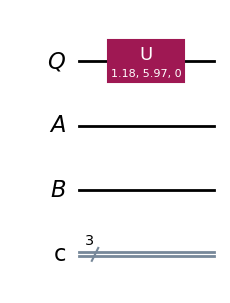

In [4]:
#Um Estado arbitrário para Q
np.random.seed(42) 
theta = np.random.uniform(0.0, 1.0) * np.pi    
phi = np.random.uniform(0.0, 2.0) * np.pi    

#Porta unitária(theta, phi, lambda,qubit(secret))
qc.u(theta, phi, 0.0, secret)

qc.draw("mpl")

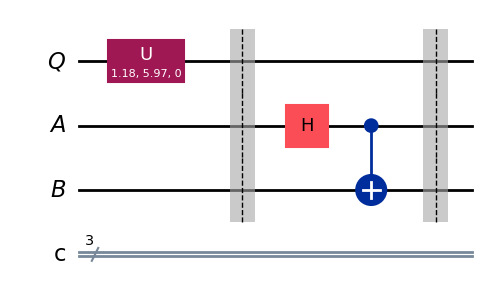

In [5]:
#Criando o estado de bell
qc.barrier()
qc.h(Alice)
qc.cx(Alice,Bob)
qc.barrier()
qc.draw(output="mpl")

### 1. Aplicando a porta Hadamard ao qubit $\ket{0}_A$

1. A matriz da porta Hadamard é:

$$
H = \frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
$$


2. Aplicando H ao estado $\ket{0}_A$:
$$\ket{\psi}_Q \otimes \ket{0}_A \otimes \ket{0}_B= 
H(\ket{\psi}_Q \otimes \ket{0}_A \otimes \ket{0}_B) = (\ket{\psi}_Q \otimes H\ket{0}_A \otimes \ket{0}_B)$$

3. Resolvendo $H\ket{0}_A$ isoladamente

$$
H \ket{0}_A =
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 & 1 \\
1 & -1
\end{bmatrix}
\begin{bmatrix}
1 \\
0
\end{bmatrix}
=
\frac{1}{\sqrt{2}}
\begin{bmatrix}
1 \\
1
\end{bmatrix}
= \frac{1}{\sqrt{2}}(\ket{0}_A + \ket{1}_A)
$$


### 2. Aplicando a porta CNOT com controle em A e alvo em B

1. Após aplicar a Hadamard em A e deixando B em $\ket{0}_B$, o estado do sistema é:

$$
\ket{\psi} \otimes \left( \frac{1}{\sqrt{2}}(\ket{0}_A + \ket{1}_A) \right) \otimes \ket{0}_B =
\ket{\psi} \otimes \frac{1}{\sqrt{2}}(\ket{0}_A\ket{0}_B + \ket{1}_A\ket{0}_B)
= \ket{\psi} \otimes  \frac{1}{\sqrt{2}}(\ket{00} + \ket{10})
$$

2. Aplicando a porta CNOT controle em A, alvo em B :

$$
\text{CNOT} \left(\ket{\psi} \otimes \frac{1}{\sqrt{2}}(\ket{00} + \ket{10}) \right)
= \ket{\psi} \otimes \text{CNOT} (\frac{1}{\sqrt{2}}(\ket{00} + \ket{10}))
= \ket{\psi} \otimes \frac{1}{\sqrt{2}}(\ket{00} + \ket{11})
$$


3. Estado final do sistema(Estado de Bell):

$$
\ket{\phi} = \ket{\psi} \otimes \frac{1}{\sqrt{2}}(\ket{00} + \ket{11})
$$


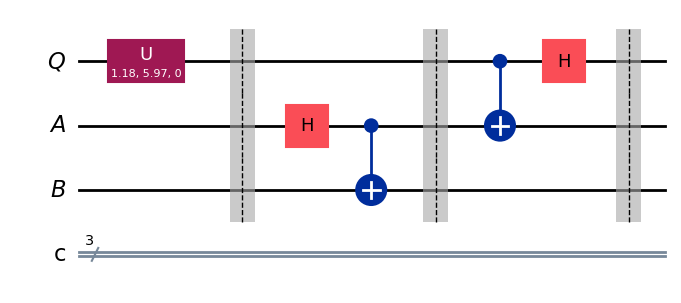

In [6]:
qc.cx(secret,Alice)
qc.h(secret)
qc.barrier()

qc.draw("mpl")

## Cnot com controle em secret e alvo em alice.

1. Reescrever $\ket{\phi}_{AB}=\ket{\psi} \otimes \frac{1}{\sqrt{2}}(\ket{00} + \ket{11})$

$$
\begin{align*}
\ket{\phi}_{AB}=
&= \ket{\psi} \otimes \frac{1}{\sqrt{2}}(\ket{00} + \ket{11}) \\
&= \ket{\psi} \otimes \frac{1}{\sqrt{2}}(\ket{00} + \ket{11}) \\
&= (\alpha\ket{0} + \beta\ket{1}) \otimes \frac{1}{\sqrt{2}}(\ket{00} + \ket{11}) \\
&= \frac{1}{\sqrt{2}} \left[\alpha\ket{0} \otimes (\ket{00} + \ket{11}) + \beta\ket{1} \otimes (\ket{00} + \ket{11}) \right] \\
&= \frac{1}{\sqrt{2}} \left[\alpha(\ket{0}\otimes\ket{00}) + \alpha(\ket{0}\otimes\ket{11}) + \beta(\ket{1}\otimes\ket{00}) + \beta(\ket{1}\otimes\ket{11}) \right] \\
&= \frac{1}{\sqrt{2}} \left[\alpha\ket{000} + \alpha\ket{011} + \beta\ket{100} + \beta\ket{111} \right]
\end{align*}
$$

2. Então temos um estado reescrito como $\ket{\phi^{'}}=\alpha\ket{000} + \alpha\ket{011} + \beta\ket{100} + \beta\ket{111}$

3. Aplicando o CNOT(C=Alice,A=secret)
$$
\begin{align*}
CNOT(\frac{1}{\sqrt{2}} \left[\alpha\ket{000} + \alpha\ket{011} + \beta\ket{100} + \beta\ket{111} \right]) \\
= (\frac{1}{\sqrt{2}} \left[\alpha\ket{000} + \alpha\ket{011} + \beta\ket{110} + \beta\ket{101} \right]) 
\end{align*}
$$

4. Agora temos o estado:

$$
\ket{\phi^{''}}=(\frac{1}{\sqrt{2}} \left[\alpha\ket{000} + \alpha\ket{011} + \beta\ket{110} + \beta\ket{101} \right])
$$

## Aplicar uma porta Hadamard em secret

1.aplicar $H\ket{\phi^{''}}$ 
$$\begin{align*}
H\ket{\phi^{''}} = 
& H \left( \frac{1}{\sqrt{2}} \left[\alpha\ket{000} + \alpha\ket{011} + \beta\ket{110} + \beta\ket{101}\right] \right) \\
&= \frac{1}{\sqrt{2}}( H \left[\alpha\ket{000} + \alpha\ket{011} + \beta\ket{110} + \beta\ket{101}\right]  \\
= \; & \frac{1}{\sqrt{2}} \left[
\alpha \left( \frac{1}{\sqrt{2}}(\ket{000} + \ket{100}) \right) +
\alpha \left( \frac{1}{\sqrt{2}}(\ket{011} + \ket{111}) \right) \right. \\
& \left. + \beta \left( \frac{1}{\sqrt{2}}(\ket{010} - \ket{110}) \right) +
\beta \left( \frac{1}{\sqrt{2}}(\ket{001} - \ket{101}) \right)
\right] \\
= \; & \frac{1}{2}\left[
\alpha\ket{000} + \alpha\ket{100} + \alpha\ket{011} + \alpha\ket{111} \right. \\
& \left. + \beta\ket{010} - \beta\ket{110} + \beta\ket{001} - \beta\ket{101}
\right]
\end{align*}$$

2. Reescrever o Estado:
$$

\begin{align*}
\frac{1}{2}\left[
\alpha\ket{000} + \alpha\ket{100} + \alpha\ket{011} + \alpha\ket{111} \right.
\left. + \beta\ket{010} - \beta\ket{110} + \beta\ket{001} - \beta\ket{101}
\right]\\ 
= \frac{1}{2} \left( 
\ket{0}_Q \ket{0}_A (\alpha \ket{0}_B + \beta\ket{1}_B)
+ \ket{1}_Q \ket{0}_A(\alpha \ket{0}_B - \beta \ket{1}_B) \right.\\
\left. + \ket{0}_Q \ket{1}_A(\alpha \ket{0}_B + \beta \ket{1}_B) 
+ \ket{1}_Q \ket{1}_A(-\alpha \ket{0}_B + \beta \ket{1}_B)
\right)
\end{align*}
$$


## Medição em Alice

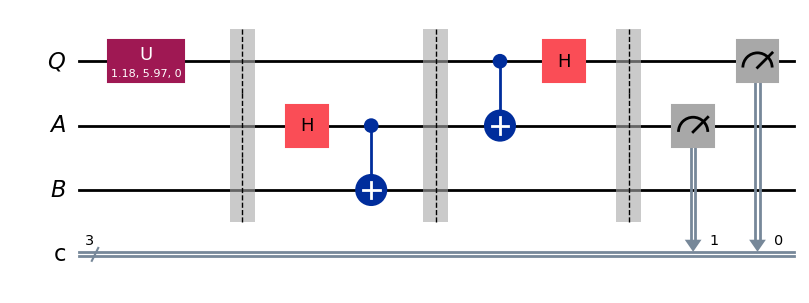

In [7]:
#Medição
qc.measure(Alice, cr[1])
qc.measure(secret, cr[0])
qc.draw("mpl")

| **Medição de Alice** | **Estados do Qubit de Bob** |
|----------------------|------------------|
| `00` | $\alpha \ket{0} + \beta \ket{1}$ |
| `01` | $\alpha \ket{1} + \beta \ket{0}$ |
| `10` | $\alpha \ket{0} - \beta \ket{1}$ |
| `11` | $\alpha \ket{1} - \beta \ket{0}$ |


## Correção dos Estados de Bob

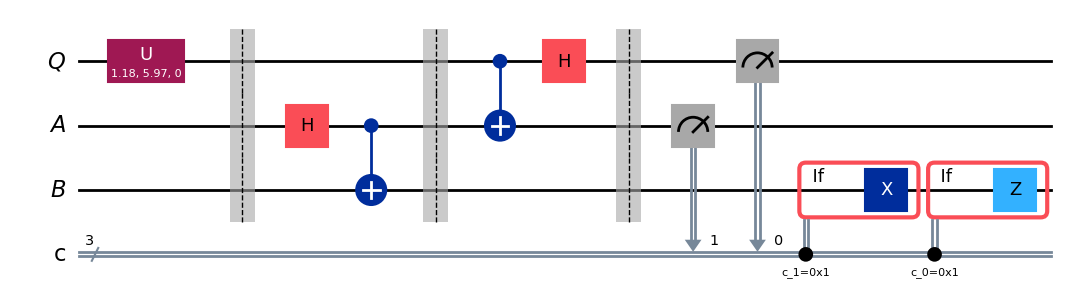

In [8]:
#Correação dos estados
with qc.if_test((cr[1], 1)):
    qc.x(Bob)
with qc.if_test((cr[0], 1)):   
    qc.z(Bob)

qc.draw("mpl")

1. Com Bob conhecendo o os resultados de Alice ele pode corrigir o seu estado e recuperar estado $\ket{\psi}$


| **Se o resultado for** | **Qubit de Bob** |
|----- |------------------------------------|
| `00` | Sem correção                       |
| `01` | Porta x para correção              |
| `10` | Porta Z para correção              |
| `11` | Porta XZ ou ZX para correção       |

## Medição de Bob

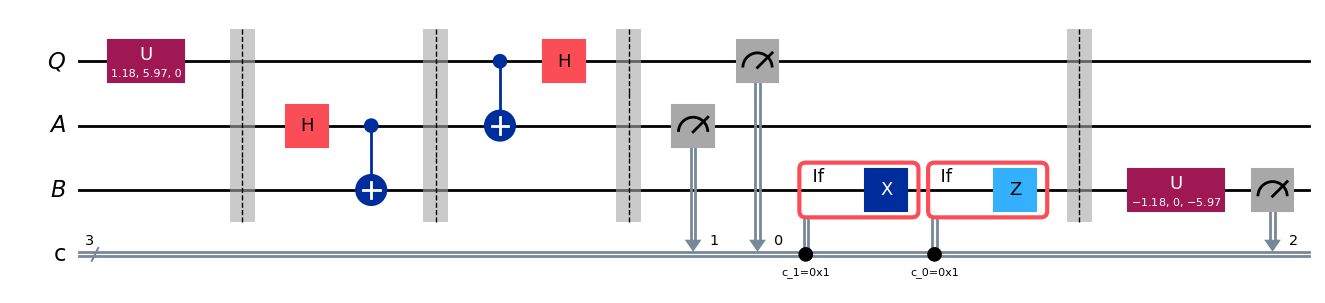

In [9]:
qc.barrier()

qc.u(theta, phi, 0.0, Bob).inverse()   
qc.measure(Bob, cr[2]) 

qc.draw(output="mpl")

### Otimização

In [11]:
#Otimização / Seleção de Backend
from qiskit_ibm_runtime import QiskitRuntimeService 
service = QiskitRuntimeService(
    channel="ibm_cloud",
    token="tiiCZyF0j7F0EQzZqxt77n-3yvVFzrGHRFY7ChUMWqpt",
    instance="crn:v1:bluemix:public:quantum-computing:us-east:a/2c29af4677414935aedd36977aacf8e4:a9664938-9945-4498-9464-26d0281168b5::"
)

#Pedindo um backend que seja operacional , seja real, e tenha no minimo 127 qubits
backend = service.least_busy(operational=True, simulator=False, min_num_qubits = 127)

print(backend.name)

ibm_brisbane


## Transpilação

In [12]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

target = backend.target #Direcionar ao backend(alvo)
pm = generate_preset_pass_manager(target=target, optimization_level=1)
qc_isa = pm.run(qc) #circuito transformado

TranspilerError: "The control-flow construct 'if_else' is not supported by the backend."

## Execução

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(mode = backend)

In [ ]:

from qiskit.primitives import BackendSamplerV2

#Preparação de simuladores
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel
noise_model = NoiseModel.from_backend(backend) #Simular o ruído 

backend_sim = AerSimulator(noise_model=noise_model)
sampler_sim = BackendSamplerV2(backend = backend_sim)

from qiskit.providers.fake_provider import GenericBackendV2
backend_gen = GenericBackendV2(num_qubits=18)
sampler_gen = BackendSamplerV2(backend = backend_gen)

In [ ]:
job = sampler.run([qc_isa]) #Envia o circuito transpilado para execução em um computador quântico real da IBM.

res = job.result() #
counts = res[0].data.c.get_counts()

### Pós-Processamento

In [14]:
#plotar um gráfico
from qiskit.visualization import plot_histogram
plot_histogram(counts)

NameError: name 'counts' is not defined